In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
CMG = pd.read_csv('/content/CMG.csv',sep=";")
CMG = CMG.dropna() # Drop missing values
CMG = CMG.reset_index(drop=True) # Reset the index

CMG

,Date,Price,High,Low
0,15/12/2016,9602.3,9602.3,9602.3
1,16/12/2016,9352.8,9352.8,9352.8
2,19/12/2016,9352.8,9352.8,9352.8
3,21/12/2016,9415.2,9415.2,9228.1
4,23/12/2016,9321.7,9321.7,8978.7
...,...,...,...,...
1739,11/12/2023,38850.0,38850.0,38300.0
1740,12/12/2023,39000.0,39000.0,38300.0
1741,13/12/2023,38900.0,38900.0,37000.0
1742,14/12/2023,38900.0,38900.0,38350.0


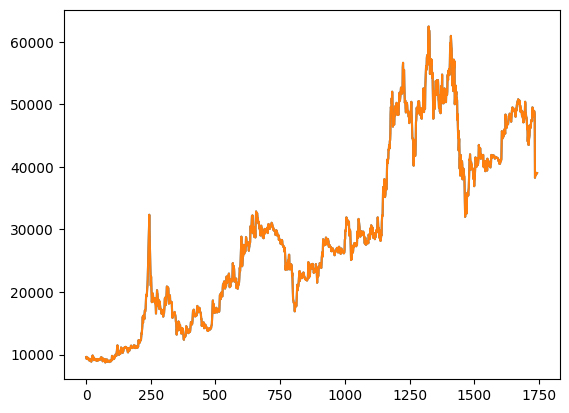

In [3]:
# gán biến
y = CMG[['Price']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
x =CMG[['High']] # các biến độc lập

plt.plot(x)
plt.plot(y)
plt.show()

#7:3


In [40]:
train_size = int(0.7 * len(CMG))
test_size = len(CMG) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [41]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [42]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid = y_pred_sigmoid.reshape(-1,1)

In [43]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [44]:
# in kết quả độ chính xác của mô hình 7:3
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 3.758096770798857
RBF MAE:  2089.533929503907
RBF Testing RMSE: Price    5127.04276
dtype: float64
Poly MAPE: 24.36067563607536
Poly MAE: 11959.696282603032
Poly Testing RMSE: Price    13399.669949
dtype: float64
Sigmoid MAPE: 51.741813814967244
Sigmoid MAE: 24568.780859594197
Sigmoid Testing RMSE: Price    25246.704954
dtype: float64


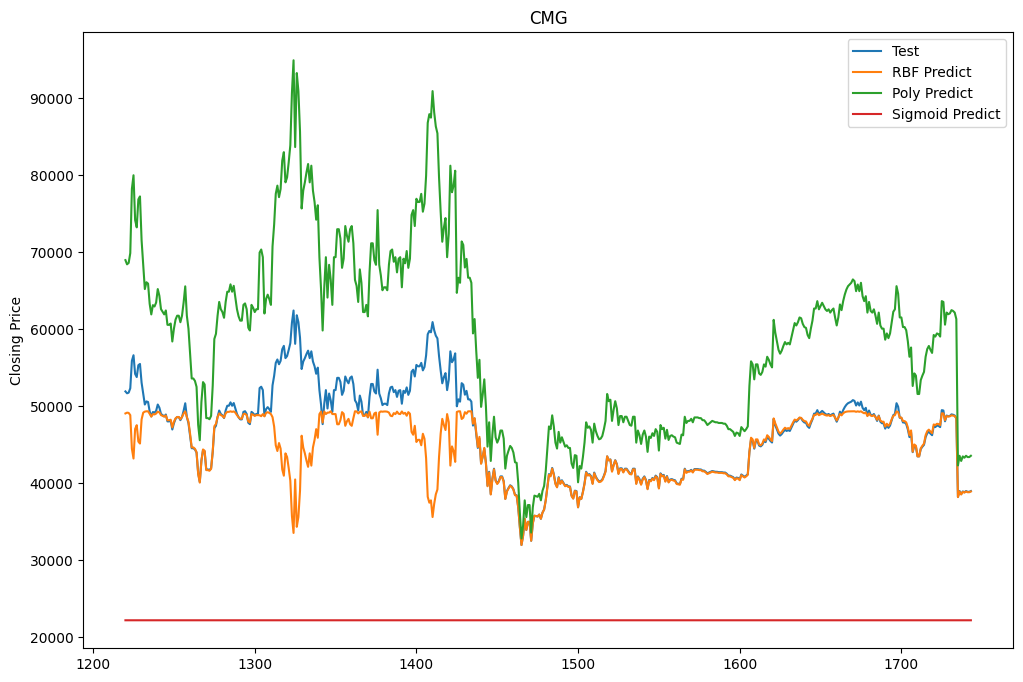

In [45]:
#vẽ mô hình 7:3
plt.figure(figsize=(12, 8))

plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('CMG')
plt.legend()
plt.show()

In [46]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = CMG.index[-1]
last_row = CMG.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[39000.]])

In [49]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf= []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data1 = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data1 = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875])]
Kết quả dự đoán sử dụng Poly: [array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.61560875]), array([22234.6

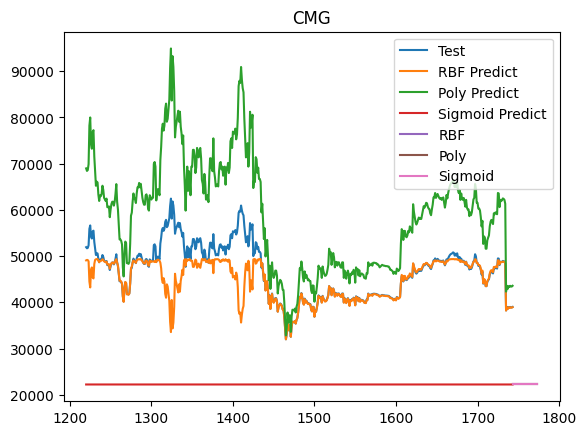

In [50]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
#plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('CMG')
plt.legend()
plt.show()

# 8:2


In [51]:
train_size = int(0.8 * len(CMG))
test_size = len(CMG) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [52]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [53]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid = y_pred_sigmoid.reshape(-1,1)

In [54]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [55]:
# in kết quả độ chính xác của mô hình 8:2
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 0.2903457357874319
RBF MAE:  161.3435564362041
RBF Testing RMSE: Price    704.064605
dtype: float64
Poly MAPE: 4.112712806228489
Poly MAE: 1779.183184847534
Poly Testing RMSE: Price    2161.732519
dtype: float64
Sigmoid MAPE: 45.266130458667305
Sigmoid MAE: 20590.385441630824
Sigmoid Testing RMSE: Price    21304.909534
dtype: float64


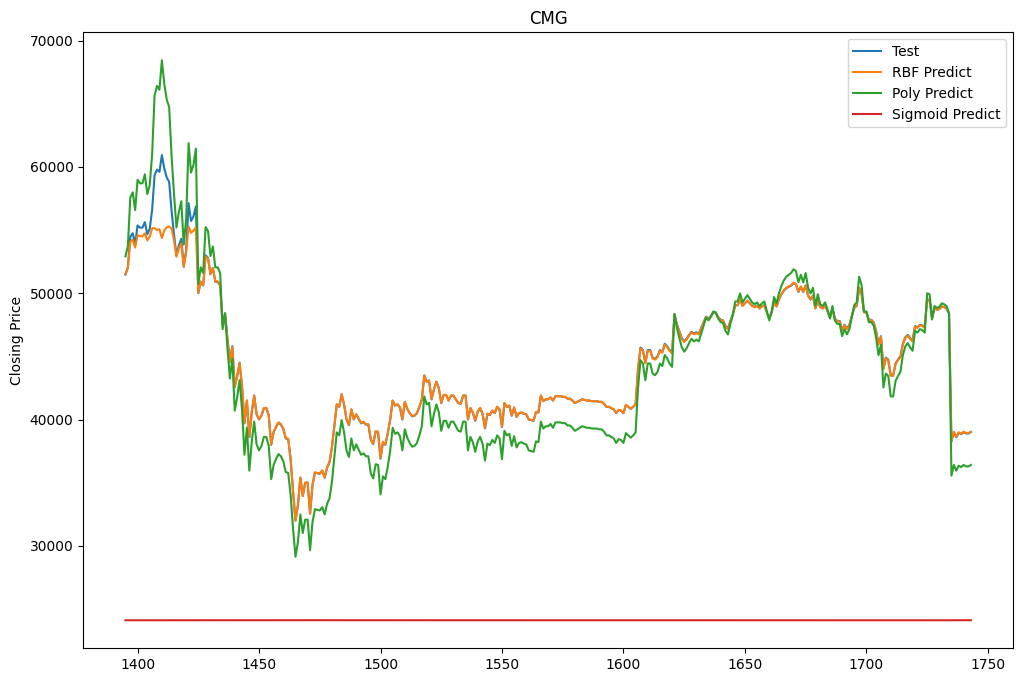

In [56]:
#vẽ mô hình 8:2
plt.figure(figsize=(12, 8))

plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('CMG')
plt.legend()
plt.show()

In [57]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = CMG.index[-1]
last_row = CMG.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[39000.]])

In [58]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf= []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data1 = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data1 = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166])]
Kết quả dự đoán sử dụng Poly: [array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.40183166]), array([39038.4

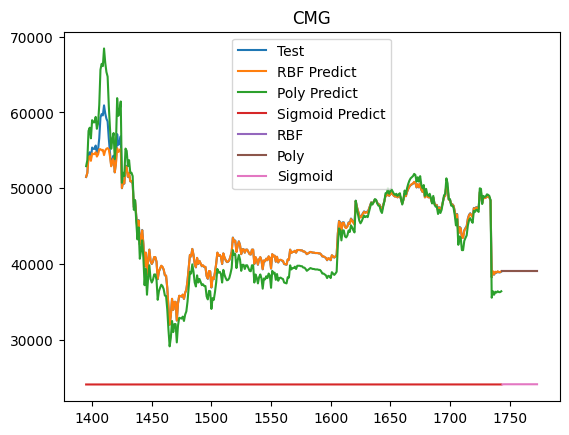

In [59]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
#plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('CMG')
plt.legend()
plt.show()

#9:1


In [60]:
train_size = int(0.9 * len(CMG))
test_size = len(CMG) - train_size

y_train = y[:train_size]
x_train = x[:train_size]
y_test = y[train_size:]
x_test = x[train_size:]

In [61]:
# tạo mô hình svr
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(x_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(x_train, y_train)

svr_sigmoid = SVR(kernel='sigmoid')
svr_sigmoid.fit(x_train, y_train)

SVR(kernel='sigmoid')

In [62]:
# dự đoán giá đóng cửa của FPT trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(x_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

y_pred_sigmoid = svr_sigmoid.predict(x_test)
y_pred_sigmoid = y_pred_sigmoid.reshape(-1,1)

In [63]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

mape_sigmoid = mean_absolute_percentage_error(y_test, y_pred_sigmoid) * 100
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
test_rmse_sigmoid = np.sqrt(np.mean((y_pred_sigmoid - y_test)**2))

In [64]:
# in kết quả độ chính xác của mô hình 9:1
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)

print("Sigmoid MAPE:", mape_sigmoid)
print("Sigmoid MAE:",  mae_sigmoid)
print("Sigmoid Testing RMSE:", test_rmse_sigmoid)

RBF MAPE: 0.04792029484076072
RBF MAE:  22.542769341908112
RBF Testing RMSE: Price    28.405181
dtype: float64
Poly MAPE: 2.123677390606174
Poly MAE: 921.1547127731999
Poly Testing RMSE: Price    1169.160078
dtype: float64
Sigmoid MAPE: 41.863959250719205
Sigmoid MAE: 19391.693218973447
Sigmoid Testing RMSE: Price    19693.543949
dtype: float64


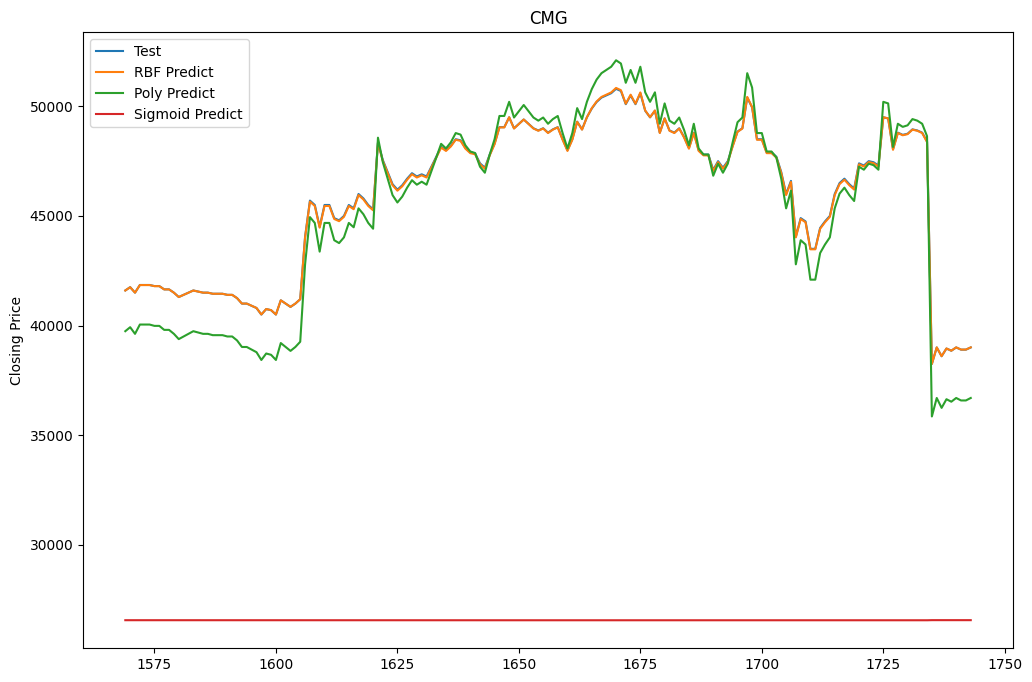

In [65]:
#vẽ mô hình 9:1
plt.figure(figsize=(12, 8))

plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')
plt.ylabel('Closing Price')
plt.title('CMG')
plt.legend()
plt.show()

In [66]:
# láy giá trị Price của ngày cuối cùng trong dataset
last_index = CMG.index[-1]
last_row = CMG.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[39000.]])

In [67]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_day_rbf= []
x_next_30_day_poly = []
x_next_30_day_sigmoid = []
index_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# predict giá Price 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_rbf.append(x_pred_next)
    last_data1 = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_day_poly.append(x_pred_next)
    last_data1 = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_sigmoid.predict(last_data)
    x_next_30_day_sigmoid.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_day_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_poly)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_day_sigmoid)

Kết quả dự đoán sử dụng RBF: [array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151])]
Kết quả dự đoán sử dụng Poly: [array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.73919151]), array([39002.7

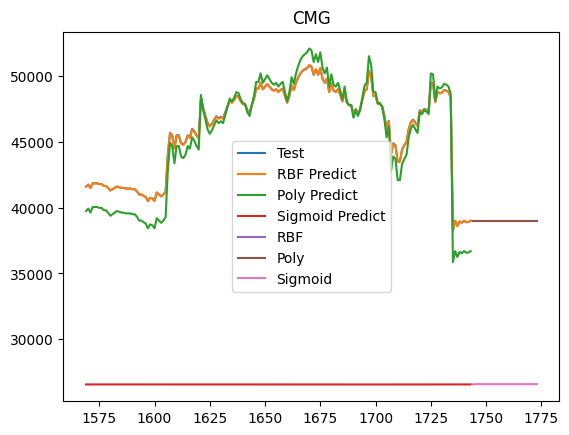

In [68]:
#vẽ mô hình
#plt.figure(figsize=(10, 6))
#plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(x_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(x_test.index, y_pred_poly, label='Poly Predict')
plt.plot(x_test.index, y_pred_sigmoid, label='Sigmoid Predict')

# Vẽ biểu đồ dự đoán sử dụng RBF
plt.plot(index_next_30_days,x_next_30_day_rbf, label='RBF')
# Vẽ biểu đồ dự đoán sử dụng Poly
plt.plot(index_next_30_days,x_next_30_day_poly, label='Poly')
# Vẽ biểu đồ dự đoán sử dụng Sigmoid
plt.plot(index_next_30_days,x_next_30_day_sigmoid, label='Sigmoid')
plt.title('CMG')
plt.legend()
plt.show()